In [2]:
%%capture
!pip install tensorflow
!pip install librosa
!pip install pydub

In [3]:
import random
import librosa
import math
import os
from pydub import AudioSegment
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def plot_waveform(waveform, sample_rate: int = 8000):
    """
    Plots a waveform from a 1D NumPy array.

    Parameters:
    waveform (np.ndarray): The 1D array representing the sound wave.
    sample_rate (int): The sample rate of the audio (default is 44100 Hz).
    """

    waveform = get_np_array(waveform)

    time_axis = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform, linewidth=1)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform Visualization")
    plt.grid(True)
    plt.show()

def get_np_array(waveform: AudioSegment):
  return np.array(waveform.get_array_of_samples())

# Example usage:
file_path = os.path.join("/content/drive/MyDrive/dataset/asthma/asthma_1.wav")
waveform = AudioSegment.from_file(file_path)
plot_waveform(waveform)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/asthma/asthma_1.wav'

In [7]:
def load_sound(file_path):
  sounds = []
  for file in os.listdir(file_path):
    if file.endswith(".wav"):
      file_name = os.path.join(file_path, file)
      sounds.append(AudioSegment.from_file(file_name))
  return sounds

In [8]:
urti = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/urti")
pneumonia = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/pneumonia")
none = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/no potential disease detected")
lrti = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/lrti")
copd = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/copd")
bronchiolitis = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/bronchiolitis")
bronchiectasis = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/bronchiectasis")
asthma = load_sound("/content/drive/MyDrive/Pulmonary Prediction/dataset/asthma")

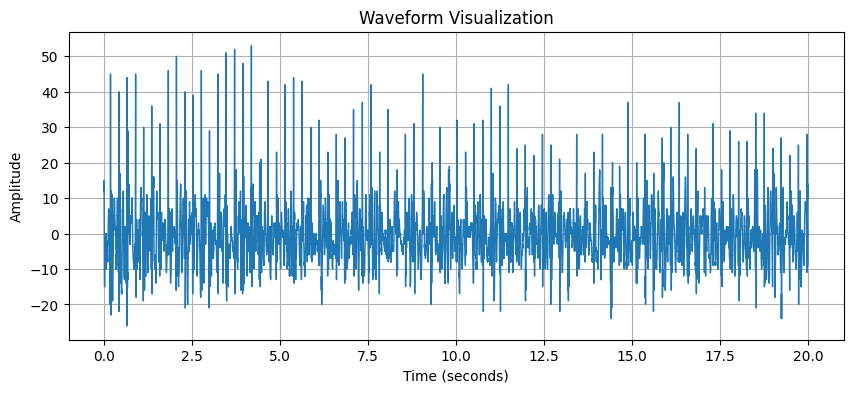

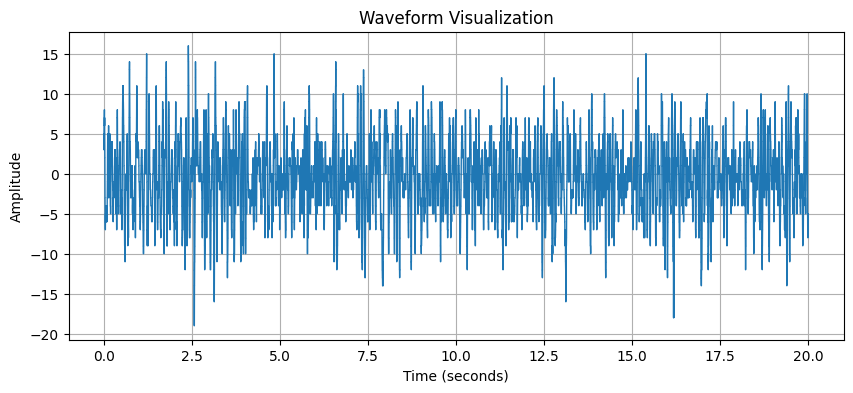

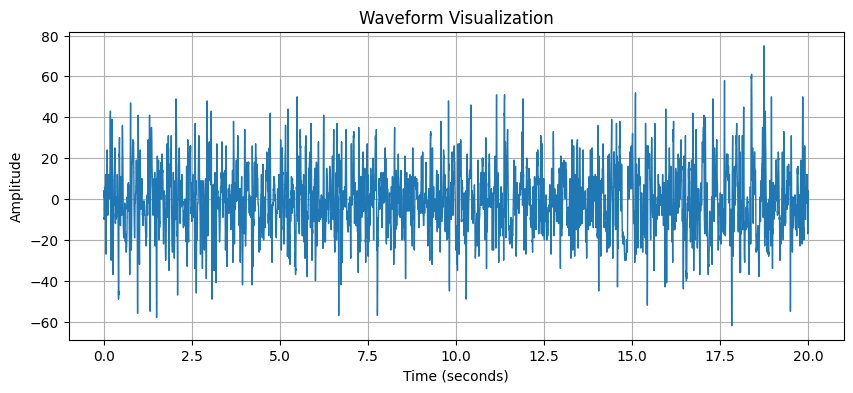

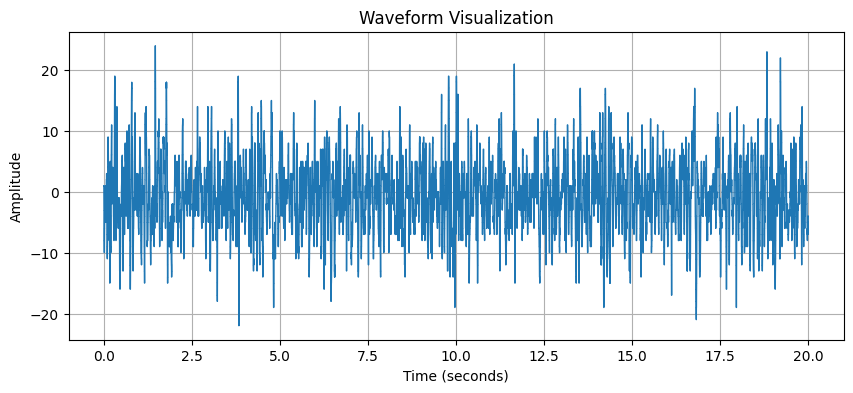

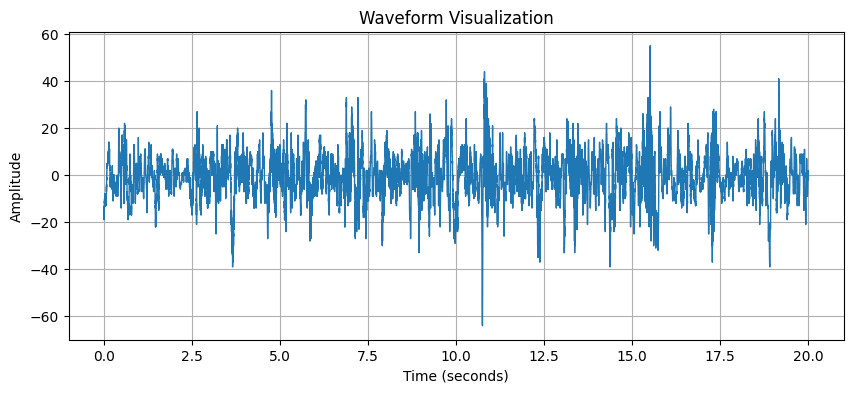

In [12]:
for sound in urti[:5]:
  plot_waveform(sound)

In [38]:
def test_data(sounds):
  data = []
  index = []

  max_len = max(len(category) for category in sounds)

  for i in range(max_len):
    # evenly for any type of disease

    for j, category in enumerate(sounds):
      selected = category[i % len(category)]
      split = split_sound(selected, 4000, 4000)

      for s in split:
        s = normalize(s)
        data.append(s)
        index.append(j)

  return np.array(data), np.array(index)

def normalize(sound):
  samples = np.array(sound.get_array_of_samples(), dtype=np.float32)
  samples /= np.max(np.abs(samples))
  samples = (samples + 1) / 2
  return samples

def augument_sound(sound):
  r_pitch = random.randint(-2, 2)
  samples = np.array(sound.get_array_of_samples(), dtype=np.float32)
  samples /= np.max(np.abs(samples))
  shifted = librosa.effects.pitch_shift(samples, sr=8000, n_steps=r_pitch)
  shifted = np.int16(shifted * 32767)
  audio_segment = AudioSegment(
        shifted.tobytes(),
        frame_rate=8000,
        sample_width=1,
        channels=1)
  return audio_segment

def split_sound(sound, length, window):
  split = []
  nr_splits = math.floor((20000) / window)
  start_pos = 0
  for _ in range(nr_splits):
    end_pos = start_pos + length
    s = sound[start_pos:end_pos]
    #s = augument_sound(s)
    silence = AudioSegment.silent(duration=length)
    s = silence.overlay(s.remove_dc_offset().normalize(0))[:length]
    s = s.set_frame_rate(8000)
    s = s[:length]
    split.append(s)
    start_pos += window
  return split

In [41]:
x, y = test_data((none,
                  urti,
                  pneumonia,
                  #lrti,
                  copd,
                  bronchiolitis,
                  bronchiectasis,
                  #asthma
                  ))

print(x.shape)
print(y.shape)

(1800, 32000)
(1800,)


In [42]:
import tensorflow as tf
from tf_keras.callbacks import Callback
import numpy as np
import random
import librosa

def get_proper_y(label):
  labels = []
  for idx in label:
    labels.append(idx)
  return labels

#y = get_proper_y(y)

print(x.shape, len(y))

for i in y:
  print(i)

(1800, 32000) 1800
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
0
0
0
0
0
1
1
1
1
1
2

In [44]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def split(x, y, p):
  indices = np.arange(len(x))
  np.random.shuffle(indices)

  x_shuffled = x[indices]
  y_shuffled = y[indices]

  split = math.floor(len(x) * p)
  x1 = x_shuffled[:split]
  y1 = y_shuffled[:split]
  x2 = x_shuffled[split:]
  y2 = y_shuffled[split:]

  print(np.unique(y, return_counts=True))
  return x1, y1, x2, y2

def train(svm_model, x1, y1, x2, y2):
  svm_model.fit(x1, y1)
  accuracy = svm_model.score(x2, y2)
  return svm_model, accuracy

def folded_train(svm_model, x, y, p=0.7):
  x1, y1, x2, y2 = split(x, y, p)
  trained, accuracy = train(svm_model, x1, y1, x2, y2)
  print("Accuracy: " + str(accuracy))
  return trained

svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))

trained = folded_train(svm_model, x, y, 0.9)

(array([0, 1, 2, 3, 4, 5]), array([300, 300, 300, 300, 300, 300]))
Accuracy: 0.8462962962962963


In [27]:
_, _, x2, y2 = split(x, y, 0.9)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([300, 300, 300, 300, 300, 300, 300, 300]))


In [30]:
import joblib

joblib.dump(trained, 'pulmonary_model.pkl')

['pulmonary_model.pkl']

In [29]:

def predict_pneumonia_from_raw(audio_data, svm_model, target_length=8000*4):
    """
    Predicts pneumonia from raw audio, ensuring the correct input shape.

    Args:
        audio_data (np.ndarray): Raw audio waveform.
        svm_model: Trained SVM model.
        target_length (int): Expected number of audio samples.

    Returns:
        tuple: (prediction_label (str), probability (float))
    """
    # Trim or pad the waveform to match training size
    if len(audio_data) < target_length:
        audio_data = np.pad(audio_data, (0, target_length - len(audio_data)))
    else:
        audio_data = audio_data[:target_length]

    # Reshape for SVM input
    features = audio_data.reshape(1, -1)

    # Get probability score
    probability = svm_model.decision_function(features)[0]

    return probability

correct = 0
total = len(y2)

for x, ground_truth in zip(x2, y2):
  prob = predict_pneumonia_from_raw(x, svm_model)
  print(prob)

accuracy = (correct / total) * 100
print(accuracy)



[ 5.21395189  4.17286104  1.81672379  0.72146973  6.24829508  2.93157971
  7.29166733 -0.28721171]
[ 6.2656137   3.14598625  1.75476562  0.72520149  5.26201449  4.23618895
  7.27005678 -0.29455692]
[ 6.27198588  5.20120536  4.10632342  0.72275131  7.28918181  2.91725741
  1.84230904 -0.29061515]
[ 7.28884705  5.21598088  1.81861202  0.72844554  4.20470174  3.11443522
  6.25226024 -0.29617122]
[ 7.29166604  5.23521727  6.24194473  0.72266797  4.21327541  2.91401307
  1.74243339 -0.27888253]
[ 6.25041898  5.23930255  4.17341962  0.73604536  7.29239398  2.80707301
  1.74101817 -0.27895518]
[ 6.25280094  4.13617976  2.9435683   0.74038795  5.20628854  7.29166644
  1.75094112 -0.28411751]
[ 7.27377561  4.24998225  5.23975678  0.7350969   6.26295153  2.88950934
  1.73689127 -0.28417303]
[ 6.25035415  4.2048583   1.74162453  0.72552817  5.23405759  3.17573576
  7.29173238 -0.29159903]
[ 7.29393664  4.20842258  5.23493623  0.72589455  6.27043635  2.89604315
  1.71445036 -0.27546044]
[ 5.231264

In [ ]:
import os
import pickle
import matplotlib
import tensorflow
from tf_keras.models import load_model
import matplotlib.pyplot as plt

def plot_waveform_np(waveform, sample_rate: int = 16000):
    """
    Plots a waveform from a 1D NumPy array.

    Parameters:
    waveform (np.ndarray): The 1D array representing the sound wave.
    sample_rate (int): The sample rate of the audio (default is 44100 Hz).
    """

    time_axis = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform, linewidth=1)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform Visualization")
    plt.grid(True)
    plt.show()

def encode_decode_audio(autoencoder, x_data):
    #encoded = encoder.predict(x_data)
    decoded = autoencoder.predict(x_data)
    return decoded

#autoencoder = Autoencoder.load(MODEL_SAVE_DIR)

num_sample_images_to_show = 10
#sample = x_train[:num_sample_images_to_show]


'''print(sample.shape)

decoded = encode_decode_audio(autoencoder, sample)
decoded = decoded.astype("float32") / 255
print(decoded.shape)
for i in range(num_sample_images_to_show):
  plot_waveform_np(sample[i].squeeze())
  plot_waveform_np(decoded[i].squeeze())

#num_sample_images_to_show = 3000
#sample_images = x_train[:num_sample_images_to_show]
#_, latent_representations = autoencoder.reconstruct(sample_images)
#plot_images_encoded_in_latent_space(latent_representations)'''

'print(sample.shape)\n\ndecoded = encode_decode_audio(autoencoder, sample)\ndecoded = decoded.astype("float32") / 255\nprint(decoded.shape)\nfor i in range(num_sample_images_to_show):\n  plot_waveform_np(sample[i].squeeze())\n  plot_waveform_np(decoded[i].squeeze())\n\n#num_sample_images_to_show = 3000\n#sample_images = x_train[:num_sample_images_to_show]\n#_, latent_representations = autoencoder.reconstruct(sample_images)\n#plot_images_encoded_in_latent_space(latent_representations)'

In [ ]:
sound = AudioSegment.from_file("amen.wav")
data = []

print(sound.duration_seconds)

sounds = sound.remove_dc_offset().normalize(0)[::200]
for s in sounds:
  if s.duration_seconds == 0.2:
    s = s.set_frame_rate(16000).set_sample_width(2).set_channels(1)
    samples = np.array(s.get_array_of_samples(), dtype=np.float32)
    samples /= np.max(np.abs(samples))
    samples = (samples + 1) / 2
    data.append(samples)

data = np.array(data)

print(data.shape)

amen_decoded = encode_decode_audio(autoencoder, data)
#for i in decoded:
#  plot_waveform_np(i.squeeze())

def save_as_wav(waveform: np.ndarray, nr, file_path: str, original_min, original_max, sample_rate: int = 16000, normalize=True):
  """
  Saves a 1D NumPy array as a WAV file using librosa.

  Parameters:
  waveform (np.ndarray): The 1D array representing the sound wave.
  file_path (str): The path to save the WAV file.
  sample_rate (int): The sample rate of the audio (default is 22050 Hz).
  """
  waveform = waveform * 2 - 1
  waveform = np.int16(waveform * 32767)
  audio_segment = AudioSegment(
          waveform.tobytes(),
          frame_rate=sound.frame_rate,
          sample_width=2,
          channels=1)
  audio_segment.remove_dc_offset().normalize()

  audio_segment.export("/content/drive/MyDrive/WE <3 SOPHIE: Datasets/v2/model/0/amen/" + file_path + str(nr) + ".wav", format="wav")
  print("Saved to: " + file_path + str(nr) + ".wav")

for i, wave in enumerate(amen_decoded):
  save_as_wav(wave, i, "amen", 0, 1)
  save_as_wav(data[i], i, "amen" + "original", 0, 1, 16000, False)

6.986666666666666
(34, 3200)
2/2 [==============================] - 0s 33ms/step
Saved to: amen0.wav
Saved to: amenoriginal0.wav
Saved to: amen1.wav
Saved to: amenoriginal1.wav
Saved to: amen2.wav
Saved to: amenoriginal2.wav
Saved to: amen3.wav
Saved to: amenoriginal3.wav
Saved to: amen4.wav
Saved to: amenoriginal4.wav
Saved to: amen5.wav
Saved to: amenoriginal5.wav
Saved to: amen6.wav
Saved to: amenoriginal6.wav
Saved to: amen7.wav
Saved to: amenoriginal7.wav
Saved to: amen8.wav
Saved to: amenoriginal8.wav
Saved to: amen9.wav
Saved to: amenoriginal9.wav
Saved to: amen10.wav
Saved to: amenoriginal10.wav
Saved to: amen11.wav
Saved to: amenoriginal11.wav
Saved to: amen12.wav
Saved to: amenoriginal12.wav
Saved to: amen13.wav
Saved to: amenoriginal13.wav
Saved to: amen14.wav
Saved to: amenoriginal14.wav
Saved to: amen15.wav
Saved to: amenoriginal15.wav
Saved to: amen16.wav
Saved to: amenoriginal16.wav
Saved to: amen17.wav
Saved to: amenoriginal17.wav
Saved to: amen18.wav
Saved to: amenorig